# Final Project

**Due date: Saturday, December 9th**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

# US National Parks Visitor Data

For my final project I decided to use National Parks Service data on visits to US National Parks from 1904 through 2022.

In [1]:
library('tidyverse')

Warning message:
“Failed to locate timezone database”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# Read in National Parks dataset from github
national_parks = read.table(file = "https://raw.githubusercontent.com/emsander/BIOS512_assignments/main/National_Park_Visitor_Data.csv", 
                            sep = ",", 
                            header = TRUE)

In [3]:
# Preview dataset
national_parks |> head()

,RegionName,ParkName,ParkType,Year,Visitors
,<chr>,<chr>,<chr>,<int>,<chr>
1,Alaska Region,Denali NP & PRES,National Park,2022,"427,562"
2,Alaska Region,Denali NP & PRES,National Park,2021,"229,521"
3,Alaska Region,Denali NP & PRES,National Park,2020,"54,850"
4,Alaska Region,Denali NP & PRES,National Park,2019,"601,152"
5,Alaska Region,Denali NP & PRES,National Park,2018,"594,660"
6,Alaska Region,Denali NP & PRES,National Park,2017,"642,809"


In [4]:
# Convert Visitors variable from character to numeric

national_parks$Visitors = as.numeric(gsub(",", "", national_parks$Visitors))

national_parks |> head()

,RegionName,ParkName,ParkType,Year,Visitors
,<chr>,<chr>,<chr>,<int>,<dbl>
1,Alaska Region,Denali NP & PRES,National Park,2022,427562
2,Alaska Region,Denali NP & PRES,National Park,2021,229521
3,Alaska Region,Denali NP & PRES,National Park,2020,54850
4,Alaska Region,Denali NP & PRES,National Park,2019,601152
5,Alaska Region,Denali NP & PRES,National Park,2018,594660
6,Alaska Region,Denali NP & PRES,National Park,2017,642809


## Visualization 1: Total number of visitors to all national parks over time

For my first visualization, I decided to do an overview of number of visits to all of US National parks from 1904 to 2022. First, I grouped the dataset by year and created a variable specific to the number of visitors to the park system in total each year. Then I was able to go ahead and plot, using geom_line, the number of visits over time. 

In [5]:
# Grouping data by year and creating a new variable for total number of visitors per year

national_parks_total = national_parks |>
    group_by(Year) |>
    summarize(visitors_total = sum(Visitors, na.rm = TRUE))

national_parks_total |> head()

Year,visitors_total
<int>,<dbl>
1904,120690
1905,140954
1906,30569
1907,32935
1908,42768
1909,60899


Warning message:
“Removed 1 rows containing non-finite values (`stat_align()`).”


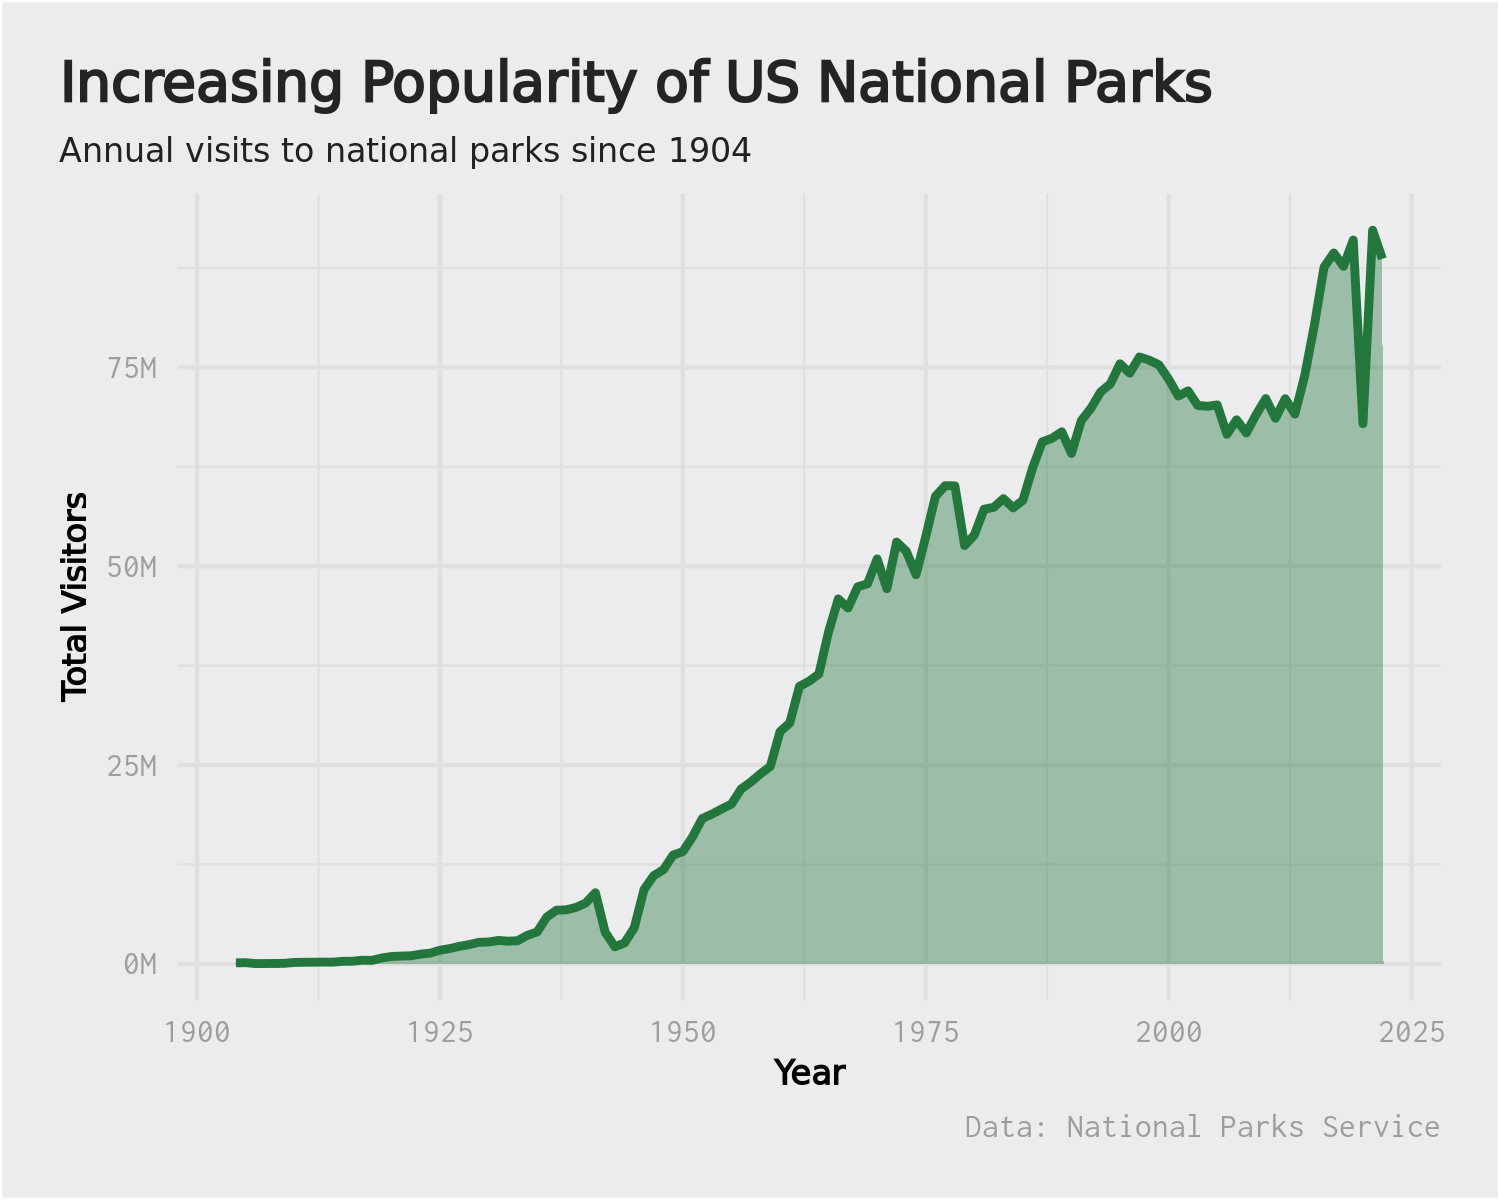

In [6]:
options(repr.plot.res = 300, repr.plot.height = 4, repr.plot.width = 5)
p = ggplot(national_parks_total, aes(x = Year, y = visitors_total)) +
    geom_line(color = '#23773c', na.rm = TRUE, linewidth = 1) +
    geom_area(position = position_identity(), alpha = 0.4, fill = '#23773c') +
    labs(x = "Year", y = "Total Visitors", title = "Increasing Popularity of US National Parks", 
         subtitle = 'Annual visits to national parks since 1904',
         caption = "Data: National Parks Service") +
     scale_y_continuous(labels = scales::label_number(scale = 1e-6, suffix = 'M')) +
     theme(plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
        plot.subtitle = element_text(color = '#212121', size = 8),
        plot.title = element_text(color = '#242424', face = 'bold'),
        plot.title.position = 'plot',
        plot.background = element_rect(fill = '#ececee'),
        panel.background = element_rect(fill = '#ececee'),
        panel.grid.major = element_line(color = '#e0e0e0'),
        panel.grid.minor = element_line(color = '#e0e0e0'),
        axis.ticks = element_blank(),
        axis.title.y = element_text(size = 8, face = 'bold'),
        axis.title.x = element_text(size = 8, face = 'bold'),
        axis.text = element_text(color = '#9d9d9d', family = 'Courier', size = 8),
        plot.caption = element_text(color = '#9d9d9d', family = 'Courier', size = 8))

p

## Visualization 2: Most popular national parks over time

For my second visualization I wanted to depict how individual National Parks have changed in popularity over time. To start I created a rank variable, whcih ranked each park each year based on the number of visitors it received compared to other parks. I then decided that I wanted to highlight the top five most popular parks both in 1904 and 2022 on my final graph. In order to do this I converted the variable ParkName to a factor, created a second factor containing the colors specific to each park for the plot, and created a secondary subset of my dataset containing only the 10 (I used to ensure that those 10 lines were brought to the front of the plot). With ggplot I used geom_line to depict the change in park popularity over time, and geom_text to label the five most popular parks from 1904 and 2022.

In [8]:
#Creating new variable rank to represent how popular a park was in a given year based off of number of visitors

national_parks_rank = national_parks |>
    group_by(Year) |>
    mutate(rank = dense_rank(desc(Visitors)))

national_parks_rank |> head()

RegionName,ParkName,ParkType,Year,Visitors,rank
<chr>,<chr>,<chr>,<int>,<dbl>,<int>
Alaska Region,Denali NP & PRES,National Park,2022,427562,44
Alaska Region,Denali NP & PRES,National Park,2021,229521,51
Alaska Region,Denali NP & PRES,National Park,2020,54850,53
Alaska Region,Denali NP & PRES,National Park,2019,601152,38
Alaska Region,Denali NP & PRES,National Park,2018,594660,37
Alaska Region,Denali NP & PRES,National Park,2017,642809,33


In [9]:
#Creating a factor for the names of the national parks

national_parks_rank$ParkName = factor(national_parks_rank$ParkName)
levels(national_parks_rank$ParkName)

[1] ""                                "Acadia NP"                      
 [3] "Arches NP"                       "Badlands NP"                    
 [5] "Big Bend NP"                     "Biscayne NP"                    
 [7] "Black Canyon of the Gunnison NP" "Bryce Canyon NP"                
 [9] "Canyonlands NP"                  "Capitol Reef NP"                
[11] "Carlsbad Caverns NP"             "Channel Islands NP"             
[13] "Congaree NP"                     "Crater Lake NP"                 
[15] "Cuyahoga Valley NP"              "Death Valley NP"                
[17] "Denali NP & PRES"                "Dry Tortugas NP"                
[19] "Everglades NP"                   "Gates of the Arctic NP & PRES"  
[21] "Gateway Arch NP"                 "Glacier Bay NP & PRES"          
[23] "Glacier NP"                      "Grand Canyon NP"                
[25] "Grand Teton NP"                  "Great Basin NP"                 
[27] "Great Sand Dunes NP & PRES"      "Great Smoky Mountains NP"       
[29] "Guadalupe Mountains NP"          "Haleakala NP"                   
[31] "Hawaii Volcanoes NP"             "Hot Springs NP"                 
[33] "Indiana Dunes NP"                "Isle Royale NP"                 
[35] "Joshua Tree NP"                  "Katmai NP & PRES"               
[37] "Kenai Fjords NP"                 "Kings Canyon NP"                
[39] "Kobuk Valley NP"                 "Lake Clark NP & PRES"           
[41] "Lassen Volcanic NP"              "Mammoth Cave NP"                
[43] "Mesa Verde NP"                   "Mount Rainier NP"               
[45] "National Park of American Samoa" "New River Gorge NP & PRES"      
[47] "North Cascades NP"               "Olympic NP"                     
[49] "Petrified Forest NP"             "Pinnacles NP"                   
[51] "Redwood NP"                      "Rocky Mountain NP"              
[53] "Saguaro NP"                      "Sequoia NP"                     
[55] "Shenandoah NP"                   "Theodore Roosevelt NP"          
[57] "Virgin Islands NP"               "Voyageurs NP"                   
[59] "White Sands NP"                  "Wind Cave NP"                   
[61] "Wrangell-St. Elias NP & PRES"    "Yellowstone NP"                 
[63] "Yosemite NP"                     "Zion NP"

In [10]:
#Re-leveling the factor such that the parks that will be highlighted are at the start

national_parks_rank = national_parks_rank |>
    mutate(ParkName = fct_relevel(ParkName, "Hot Springs NP", "Yellowstone NP", "Wind Cave NP", "Crater Lake NP",
                                  "Kings Canyon NP", "Great Smoky Mountains NP", "Grand Canyon NP", "Zion NP", 
                                  "Rocky Mountain NP", "Acadia NP", 
                                  'Arches NP', 'Badlands NP', 'Big Bend NP', 'Biscayne NP', 
                                  'Black Canyon of the Gunnison NP', 'Bryce Canyon NP', 'Canyonlands NP', 
                                  'Capitol Reef NP', 'Carlsbad Caverns NP', 'Channel Islands NP', 'Congaree NP', 
                                  'Cuyahoga Valley NP', 'Death Valley NP', 'Denali NP & PRES', 'Dry Tortugas NP', 
                                  'Everglades NP', 'Gates of the Arctic NP & PRES', 'Gateway Arch NP', 
                                  'Glacier Bay NP & PRES', 'Glacier NP', 'Grand Teton NP', 'Great Basin NP', 
                                  'Great Sand Dunes NP & PRES', 'Guadalupe Mountains NP', 'Haleakala NP', 
                                  'Hawaii Volcanoes NP', 'Indiana Dunes NP', 'Isle Royale NP', 'Joshua Tree NP', 
                                  'Katmai NP & PRES', 'Kenai Fjords NP', 'Kobuk Valley NP', 
                                  'Lake Clark NP & PRES', 'Lassen Volcanic NP', 'Mammoth Cave NP', 
                                  'Mesa Verde NP', 'Mount Rainier NP', 'National Park of American Samoa', 
                                  'New River Gorge NP & PRES', 'North Cascades NP', 'Olympic NP', 
                                  'Petrified Forest NP', 'Pinnacles NP', 'Redwood NP', 'Saguaro NP', 'Sequoia NP', 
                                  'Shenandoah NP', 'Theodore Roosevelt NP', 'Virgin Islands NP', 'Voyageurs NP', 
                                  'White Sands NP', 'Wrangell-St. Elias NP & PRES', 'Yosemite NP'))

levels(national_parks_rank$ParkName)

[1] "Hot Springs NP"                  "Yellowstone NP"                 
 [3] "Wind Cave NP"                    "Crater Lake NP"                 
 [5] "Kings Canyon NP"                 "Great Smoky Mountains NP"       
 [7] "Grand Canyon NP"                 "Zion NP"                        
 [9] "Rocky Mountain NP"               "Acadia NP"                      
[11] "Arches NP"                       "Badlands NP"                    
[13] "Big Bend NP"                     "Biscayne NP"                    
[15] "Black Canyon of the Gunnison NP" "Bryce Canyon NP"                
[17] "Canyonlands NP"                  "Capitol Reef NP"                
[19] "Carlsbad Caverns NP"             "Channel Islands NP"             
[21] "Congaree NP"                     "Cuyahoga Valley NP"             
[23] "Death Valley NP"                 "Denali NP & PRES"               
[25] "Dry Tortugas NP"                 "Everglades NP"                  
[27] "Gates of the Arctic NP & PRES"   "Gateway Arch NP"                
[29] "Glacier Bay NP & PRES"           "Glacier NP"                     
[31] "Grand Teton NP"                  "Great Basin NP"                 
[33] "Great Sand Dunes NP & PRES"      "Guadalupe Mountains NP"         
[35] "Haleakala NP"                    "Hawaii Volcanoes NP"            
[37] "Indiana Dunes NP"                "Isle Royale NP"                 
[39] "Joshua Tree NP"                  "Katmai NP & PRES"               
[41] "Kenai Fjords NP"                 "Kobuk Valley NP"                
[43] "Lake Clark NP & PRES"            "Lassen Volcanic NP"             
[45] "Mammoth Cave NP"                 "Mesa Verde NP"                  
[47] "Mount Rainier NP"                "National Park of American Samoa"
[49] "New River Gorge NP & PRES"       "North Cascades NP"              
[51] "Olympic NP"                      "Petrified Forest NP"            
[53] "Pinnacles NP"                    "Redwood NP"                     
[55] "Saguaro NP"                      "Sequoia NP"                     
[57] "Shenandoah NP"                   "Theodore Roosevelt NP"          
[59] "Virgin Islands NP"               "Voyageurs NP"                   
[61] "White Sands NP"                  "Wrangell-St. Elias NP & PRES"   
[63] "Yosemite NP"                     ""

In [11]:
# Color names for each park

highlight_colors = c("#ee5ee1", "#f8d92d", "#d7bb76", "#5ed2ee", "#5cc45c",
                     "#0d612d", "#fa4e23", "#cd4b68", "#17798b", "#af5eee",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0",
                     "#e0e0e0", "#e0e0e0", "#e0e0e0", "#e0e0e0")

In [12]:
# Creating an additional dataset only with the 10 highlighted national parks

national_parks_rank10 = national_parks_rank |>
    filter(ParkName %in% c("Hot Springs NP", "Yellowstone NP", "Wind Cave NP", "Crater Lake NP",
                           "Kings Canyon NP", "Great Smoky Mountains NP", "Grand Canyon NP", "Zion NP",
                           "Rocky Mountain NP", "Acadia NP"))
national_parks_rank10 |> head()

RegionName,ParkName,ParkType,Year,Visitors,rank
<chr>,<fct>,<chr>,<int>,<dbl>,<int>
Intermountain Region,Grand Canyon NP,National Park,2022,4732101,2
Intermountain Region,Grand Canyon NP,National Park,2021,4532677,4
Intermountain Region,Grand Canyon NP,National Park,2020,2897098,6
Intermountain Region,Grand Canyon NP,National Park,2019,5974411,2
Intermountain Region,Grand Canyon NP,National Park,2018,6380495,2
Intermountain Region,Grand Canyon NP,National Park,2017,6254238,2


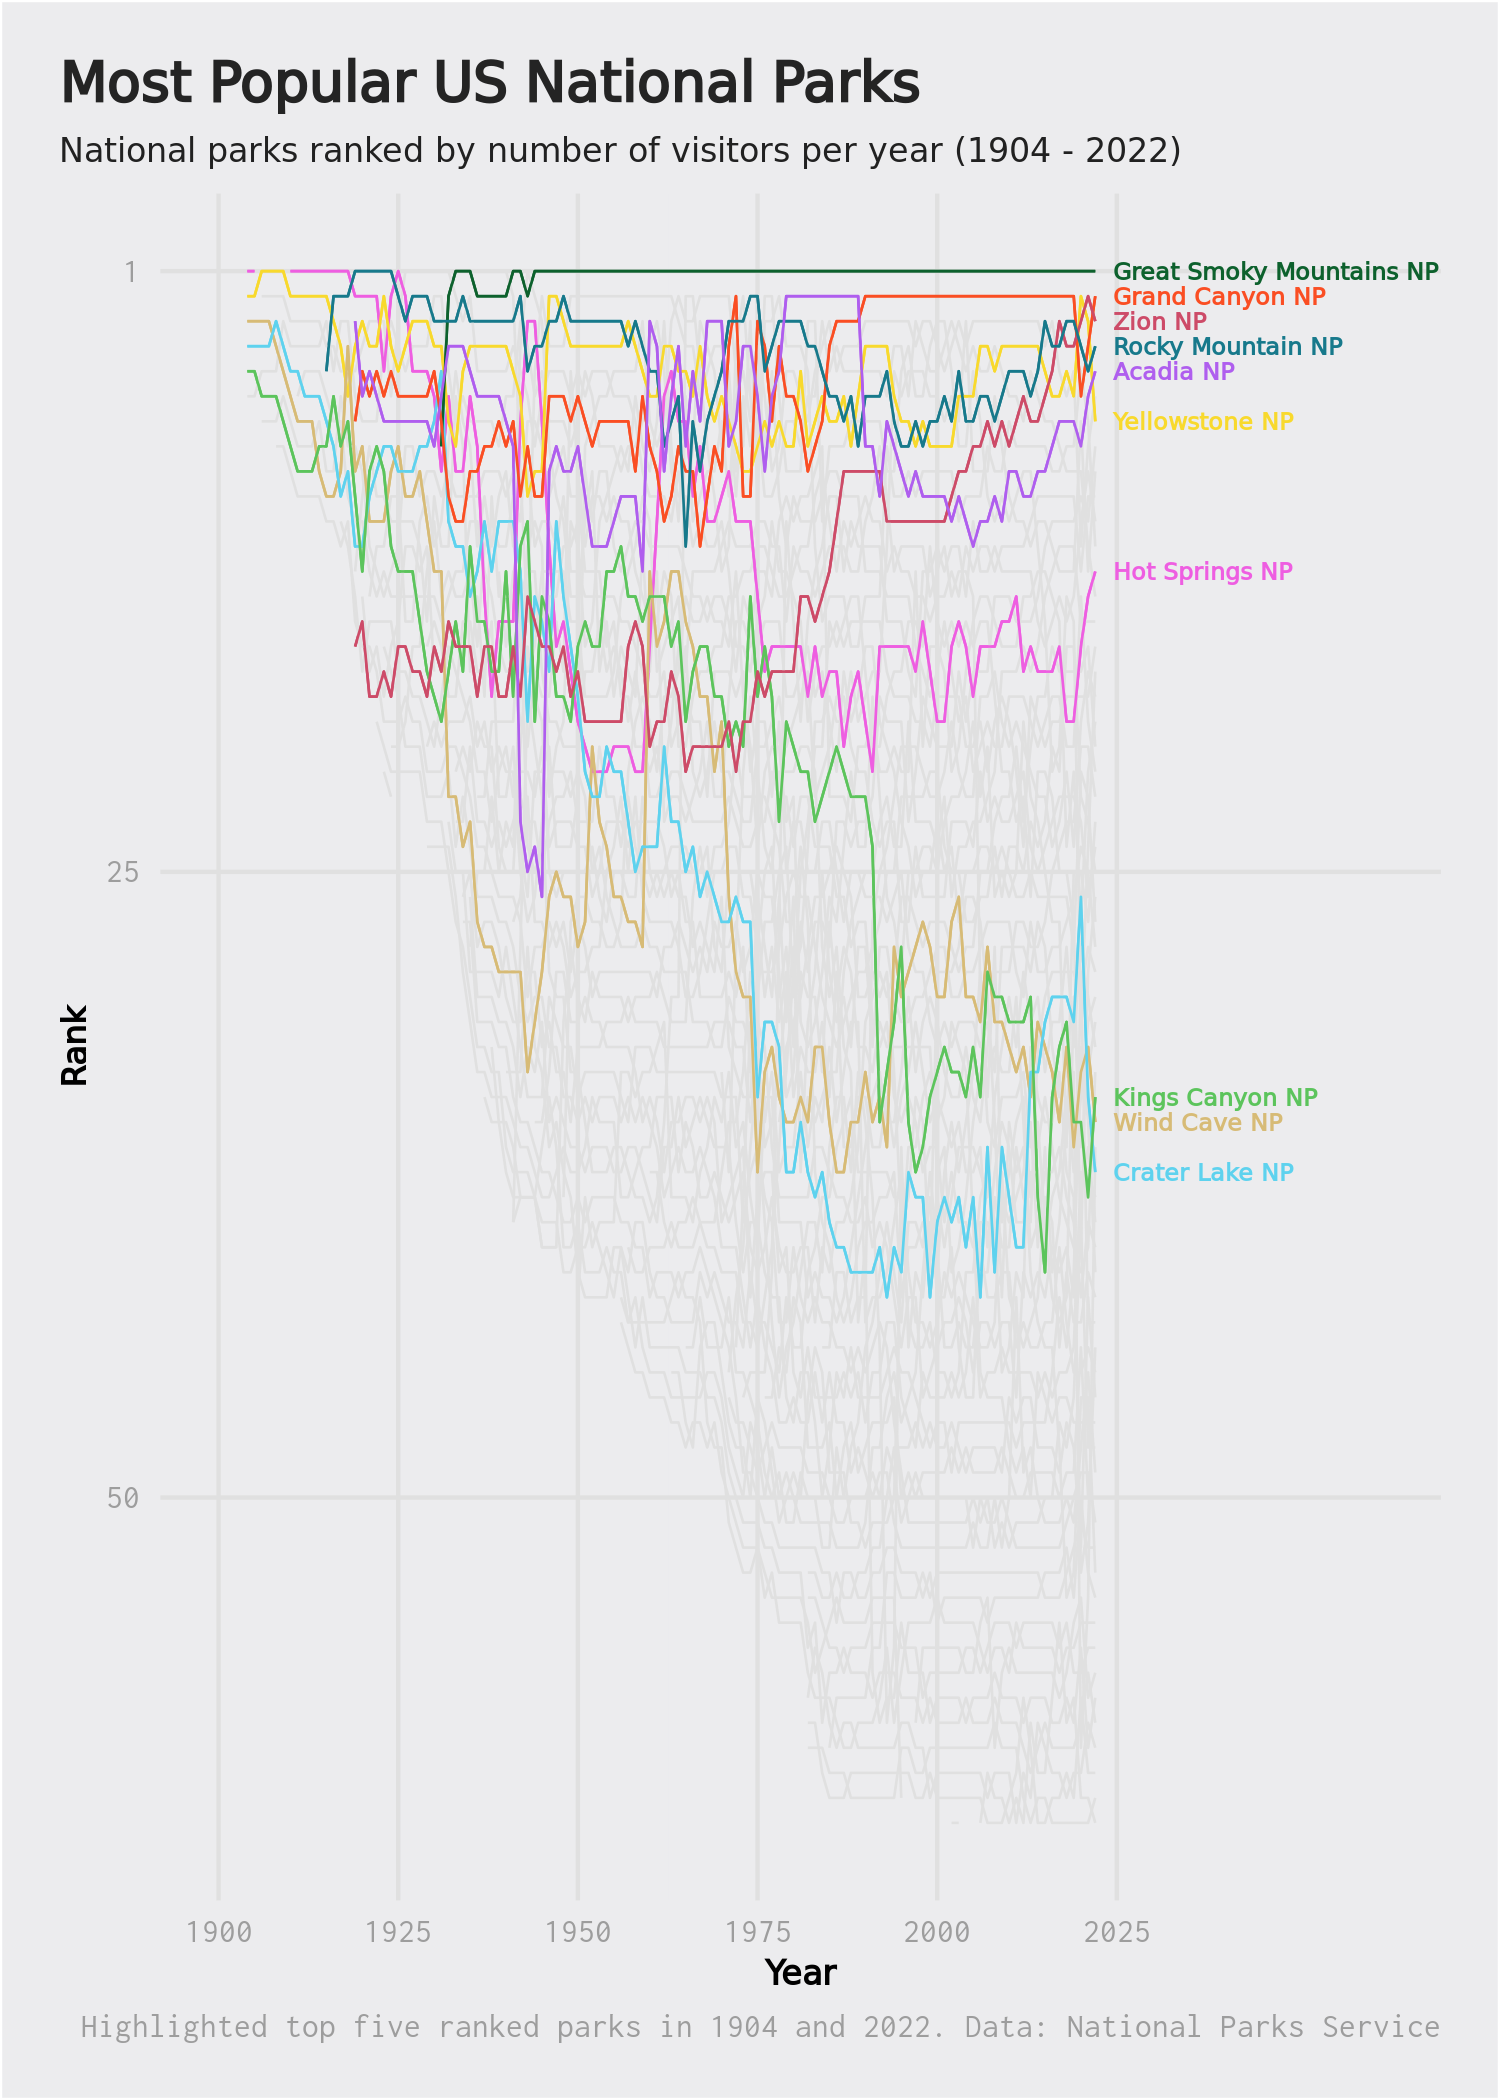

In [13]:
options(repr.plot.res = 300, repr.plot.height = 7, repr.plot.width = 5)
p = ggplot(national_parks_rank, aes(x = Year, y = rank, color = ParkName)) +
    geom_line(na.rm = TRUE, linewidth = 0.3) +
    geom_line(data = national_parks_rank10, na.rm = TRUE, linewidth = 0.3) +
    scale_x_continuous(limits = c(1900, 2062), breaks = c(1900, 1925, 1950, 1975, 2000, 2025)) +
    geom_text(data = subset(national_parks_rank10, Year == max(Year)), aes(label = ParkName, x = max(Year) + 2.5), size = 2, hjust = 0, fontface = 'bold') +
    scale_y_reverse(breaks = c(1,25,50)) +
    scale_color_manual(values = highlight_colors) +
    labs(x = "Year", y = "Rank", title = "Most Popular US National Parks", 
         subtitle = "National parks ranked by number of visitors per year (1904 - 2022)",
         caption = "Highlighted top five ranked parks in 1904 and 2022. Data: National Parks Service") +
    theme(legend.position = "none",
        plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
        plot.subtitle = element_text(color = '#212121', size = 8),
        plot.title = element_text(color = '#242424', face = 'bold'),
        plot.title.position = 'plot',
        plot.background = element_rect(fill = '#ececee'),
        panel.background = element_rect(fill = '#ececee'),
        panel.grid.major = element_line(color = '#e0e0e0'),
        panel.grid.minor = element_line(color = '#ececee'),
        axis.ticks = element_blank(),
        axis.title.y = element_text(size = 8, face = 'bold'),
        axis.title.x = element_text(size = 8, face = 'bold'),
        axis.text = element_text(color = '#9d9d9d', family = 'Courier', size = 8),
        plot.caption = element_text(color = '#9d9d9d', family = 'Courier', size = 8))

p

# Visualization 3: Parks with the highest percent change in visitors

For my third visualization, I went off of my previous graph and decided to look at the relationship between park rank in popularity in 2022 with the percent change in visitors from 1997 to 2022. I started by grouping the dataset by park name, arranging it by year, and then using mutate to create a variable for percent change over 25 years. For my specific plot, I then filtered the dataset to only include datapoints from 2022. Using ggplot, I utilized geom_point to depict the data, and geom_text and geom_curve to label the outliers.

In [14]:
national_parks_rankB = national_parks_rank |>
    group_by(ParkName) |>
    arrange(Year, .by_group = TRUE) |>
    mutate(pct_change = ((Visitors / lag(Visitors, n = 25)) - 1) * 100)

national_parks_rankB |> View()

RegionName,ParkName,ParkType,Year,Visitors,rank,pct_change
<chr>,<fct>,<chr>,<int>,<dbl>,<int>,<dbl>
Midwest Region,Hot Springs NP,National Park,1904,101000,1,NA
Midwest Region,Hot Springs NP,National Park,1905,109000,1,NA
Midwest Region,Hot Springs NP,National Park,1906,NA,NA,NA
Midwest Region,Hot Springs NP,National Park,1907,NA,NA,NA
Midwest Region,Hot Springs NP,National Park,1908,NA,NA,NA
Midwest Region,Hot Springs NP,National Park,1909,NA,NA,NA
Midwest Region,Hot Springs NP,National Park,1910,120000,1,NA
Midwest Region,Hot Springs NP,National Park,1911,130000,1,NA
Midwest Region,Hot Springs NP,National Park,1912,135000,1,NA


In [15]:
national_parks_rankB = national_parks_rankB |>
    filter(Year == 2022)

national_parks_rankB |> 
    arrange(-pct_change) |>
    print()

# A tibble: 63 × 7
# Groups:   ParkName [63]
   RegionName            ParkName       ParkType  Year Visitors  rank pct_change
   <chr>                 <fct>          <chr>    <int>    <dbl> <int>      <dbl>
 1 Alaska Region         Kobuk Valley … Nationa…  2022    16925    61      509. 
 2 Southeast  Region     Congaree NP    Nationa…  2022   204522    52      189. 
 3 Pacific West  Region  Joshua Tree NP Nationa…  2022  3058294     8      149. 
 4 Alaska Region         Wrangell-St. … Nationa…  2022    65236    56      105. 
 5 Intermountain  Region Bryce Canyon … Nationa…  2022  2354660    15      100. 
 6 Alaska Region         Lake Clark NP… Nationa…  2022    18187    60       98.3
 7 Intermountain  Region Capitol Reef … Nationa…  2022  1227608    22       96.2
 8 Intermountain  Region Zion NP        Nationa…  2022  4692417     3       91.9
 9 Midwest  Region       Indiana Dunes… Nationa…  2022  2834180    11       91.0
10 Alaska Region         Katmai NP & P… Nationa…  2022    33908 

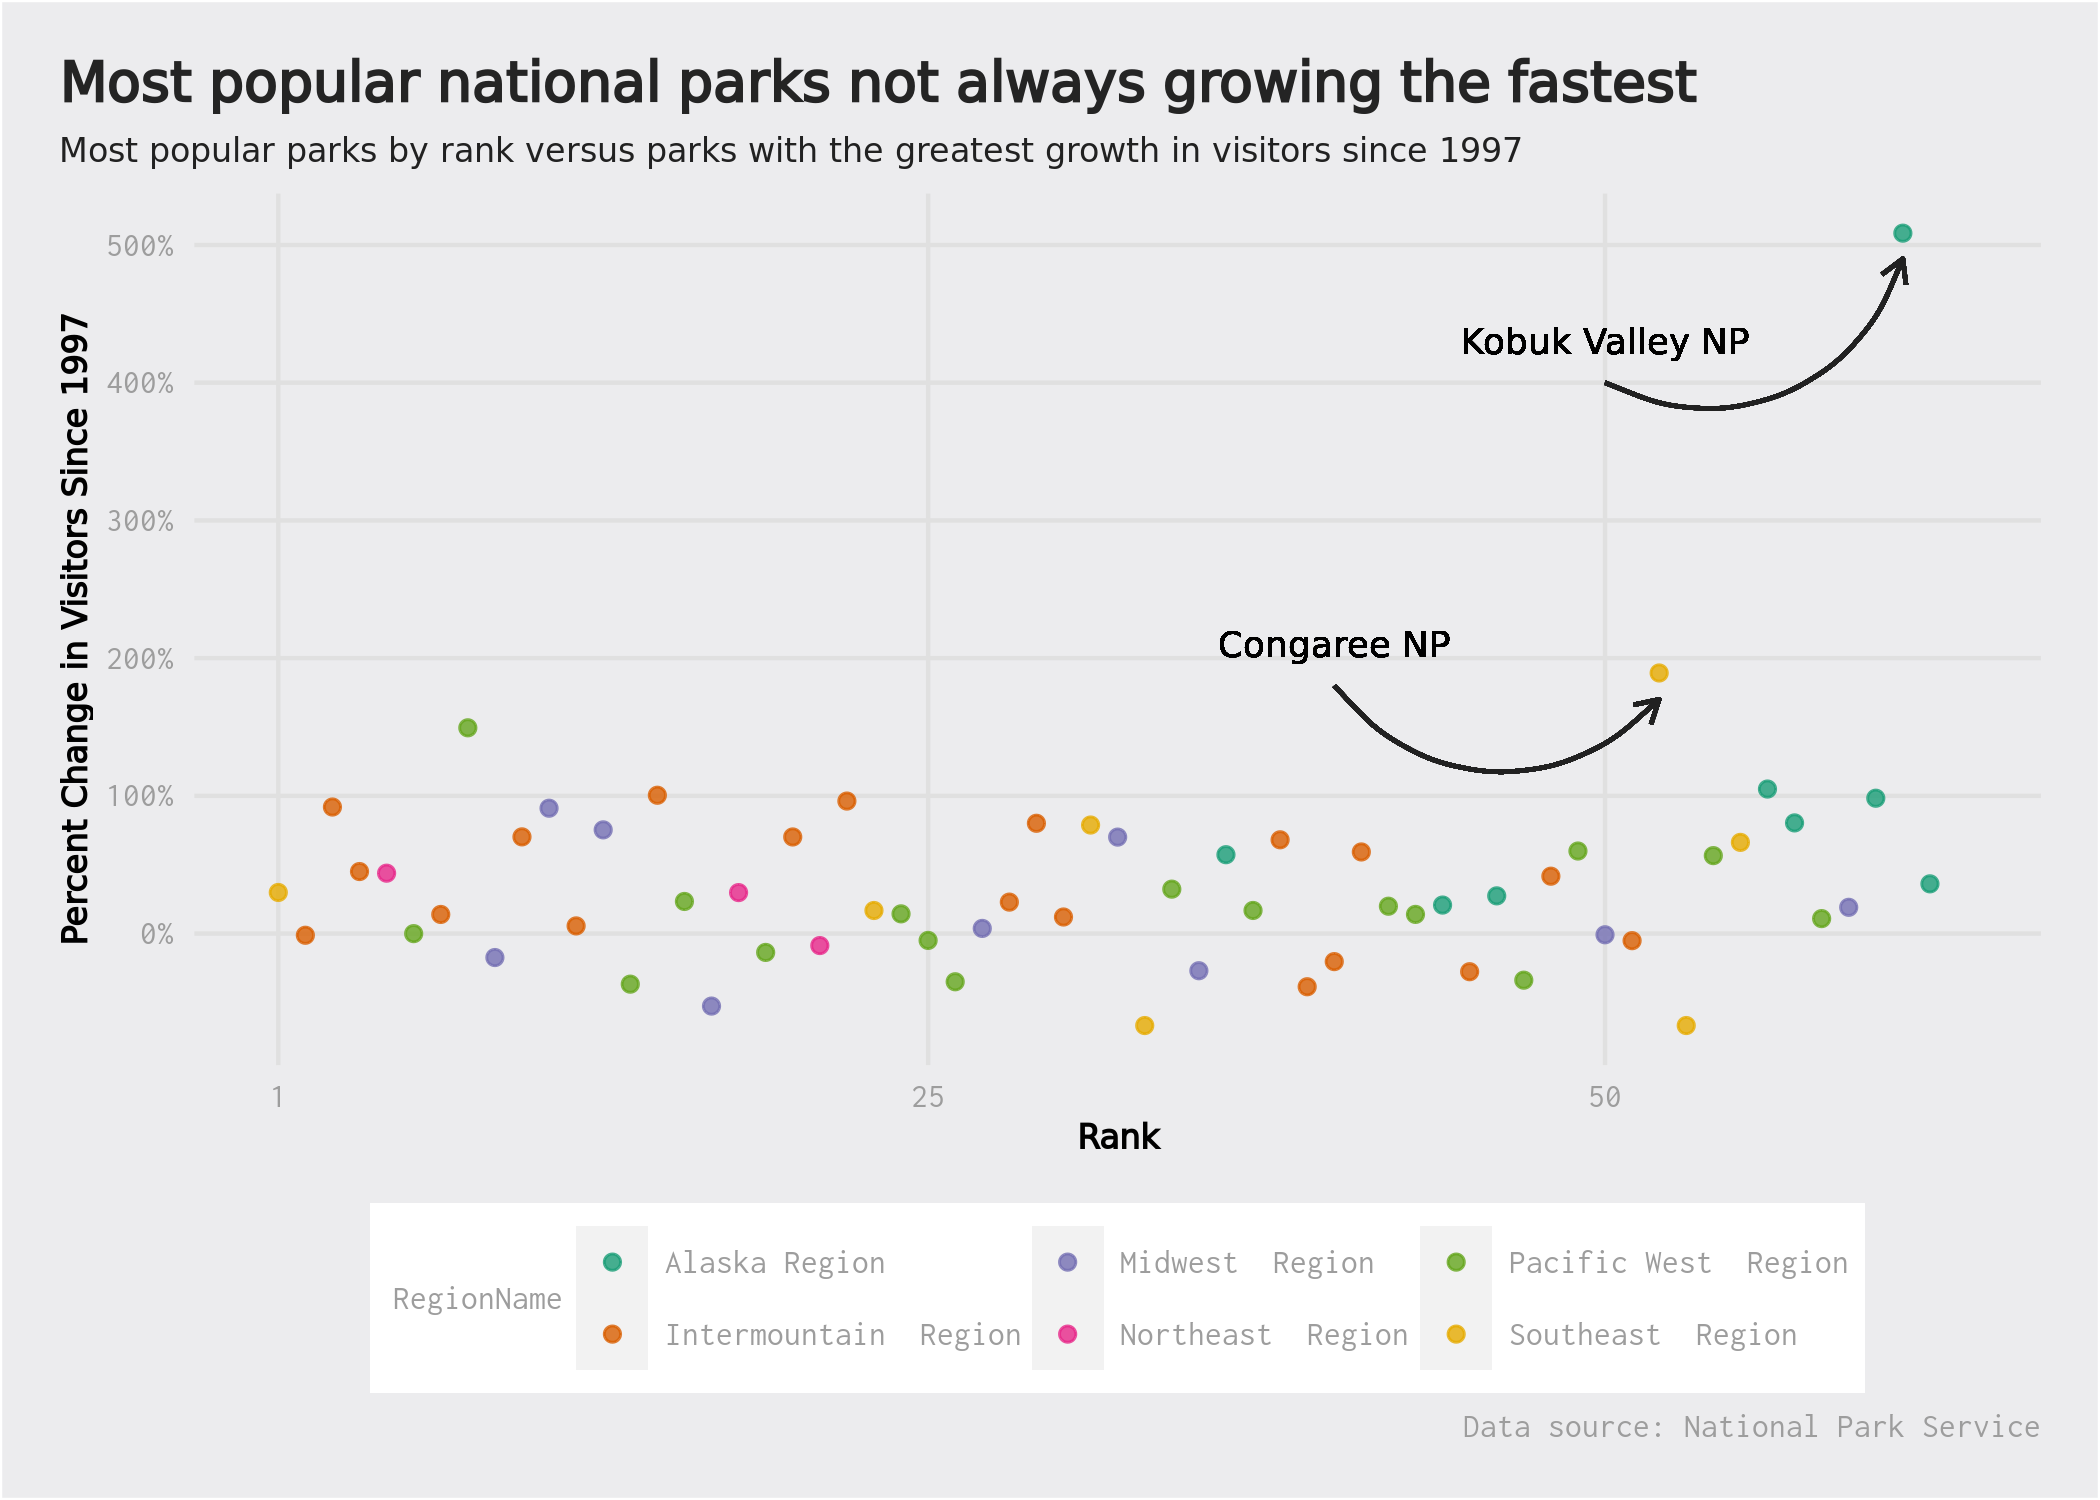

In [46]:
options(repr.plot.res = 300, repr.plot.height = 5, repr.plot.width = 7)
p = ggplot(national_parks_rankB, aes(x = rank, y = pct_change, color = RegionName)) +
    geom_point(na.rm = TRUE, alpha = 0.8) +
    geom_text(label = "Kobuk Valley NP", x = 50, y = 430, size = 3, color = 'black') +
    geom_curve(aes(x = 50, y = 400, xend = 61, yend = 490), arrow = arrow(length = unit(0.03, "npc")), color = '#212121') +
    geom_text(label = "Congaree NP", x = 40, y = 210, size = 3, color = 'black') +
    geom_curve(aes(x = 40, y = 180, xend = 52, yend = 170), arrow = arrow(length = unit(0.03, "npc")), color = '#212121') +
    scale_x_continuous(breaks = c(1,25,50)) +
    scale_y_continuous(labels = scales::percent_format(scale = 1)) +
    scale_color_brewer(palette = "Dark2") +
    labs(x = "Rank", y = "Percent Change in Visitors Since 1997", 
         title = "Most popular national parks not always growing the fastest",
         subtitle = "Most popular parks by rank versus parks with the greatest growth in visitors since 1997",
         caption = "Data source: National Park Service") +
    theme(legend.position = "bottom",
        legend.title = element_text(color = '#9d9d9d', family = 'Courier', size = 8),
        legend.text = element_text(color = '#9d9d9d', family = 'Courier', size = 8),
        plot.margin = margin(0.5, 0.5, 0.5, 0.5, "cm"),
        plot.subtitle = element_text(color = '#212121', size = 8),
        plot.title = element_text(color = '#242424', face = 'bold'),
        plot.title.position = 'plot',
        plot.background = element_rect(fill = '#ececee'),
        panel.background = element_rect(fill = '#ececee'),
        panel.grid.major = element_line(color = '#e0e0e0'),
        panel.grid.minor = element_line(color = '#ececee'),
        axis.ticks = element_blank(),
        axis.title.y = element_text(size = 8, face = 'bold'),
        axis.title.x = element_text(size = 8, face = 'bold'),
        axis.text = element_text(color = '#9d9d9d', family = 'Courier', size = 8),
        plot.caption = element_text(color = '#9d9d9d', family = 'Courier', size = 8))

p